<a href="https://colab.research.google.com/github/mjsipes/pytorch_notebooks/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
weight = 3
bias = 2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = X*weight + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[2.0000],
         [2.0600],
         [2.1200],
         [2.1800],
         [2.2400],
         [2.3000],
         [2.3600],
         [2.4200],
         [2.4800],
         [2.5400]]))

In [ ]:
from sklearn.utils import shuffle
train_split = int(0.8 * len(X))
# X, y = shuffle(X, y, random_state=42)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

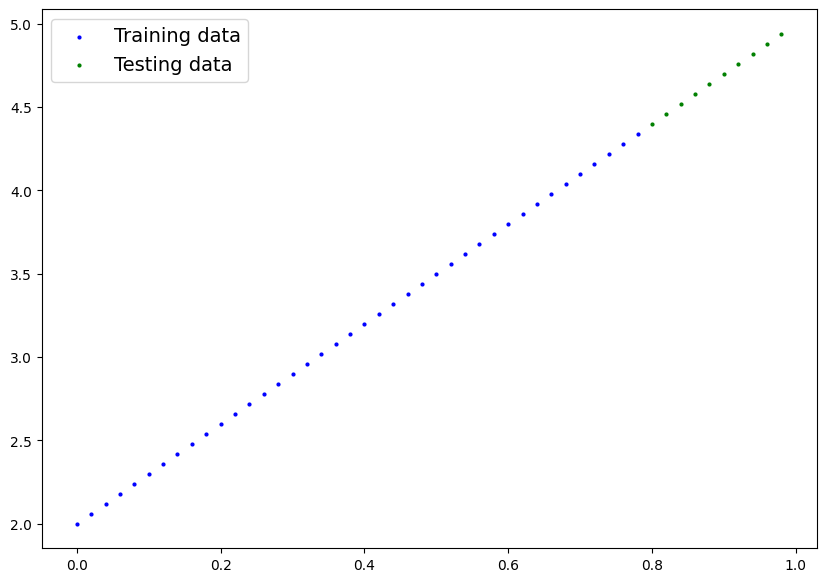

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)


In [ ]:
class LinearRegressionModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


torch.manual_seed(42)
model_0 = LinearRegressionModel0()

with torch.no_grad():
  model_0.weight[0] = 10
  model_0.bias[0] = 10


model_0, model_0.state_dict()

(LinearRegressionModel0(),
 OrderedDict([('weight', tensor([10.])), ('bias', tensor([10.]))]))

In [ ]:
class LinearRegressionModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModel1()

with torch.no_grad():
    model_1.linear_layer.weight[0] = 10
    model_1.linear_layer.bias[0] = 10

model_1, model_1.state_dict()



(LinearRegressionModel1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[10.]])),
              ('linear_layer.bias', tensor([10.]))]))

In [ ]:
import torch
torch.manual_seed(42)

model = model_1
epochs = 100
debug = True
PRINT10 = epochs/10

model.to(device)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()

    if epoch % PRINT10 == 0:
        if debug:
            for name, param in model.named_parameters():
                print(f'{name} - Param: {param.data}')
            for name, param in model.named_parameters():
                print(f'{name} - Gradient: {param.grad}')

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % PRINT10 == 0:
        if debug:
            print(f'Epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}')
            print('-' * 60)


linear_layer.weight - Param: tensor([[10.]])
linear_layer.bias - Param: tensor([10.])
linear_layer.weight - Gradient: tensor([[0.3900]])
linear_layer.bias - Gradient: tensor([1.])
Epoch: 0 | Train Loss: 10.7300 | Test Loss: 14.0953
------------------------------------------------------------
linear_layer.weight - Param: tensor([[9.6100]])
linear_layer.bias - Param: tensor([9.0000])
linear_layer.weight - Gradient: tensor([[0.3900]])
linear_layer.bias - Gradient: tensor([1.])
Epoch: 10 | Train Loss: 9.5779 | Test Loss: 12.7482
------------------------------------------------------------
linear_layer.weight - Param: tensor([[9.2200]])
linear_layer.bias - Param: tensor([8.0000])
linear_layer.weight - Gradient: tensor([[0.3900]])
linear_layer.bias - Gradient: tensor([1.])
Epoch: 20 | Train Loss: 8.4258 | Test Loss: 11.4011
------------------------------------------------------------
linear_layer.weight - Param: tensor([[8.8300]])
linear_layer.bias - Param: tensor([7.0000])
linear_layer.weig

In [ ]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())

# for name, param in model_1.named_parameters():
#     print(f'{name} - Gradient: {param.data.norm():.4f}')
#     print(f'{name} - Gradient: {param.data}')

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[6.2062]])),
             ('linear_layer.bias', tensor([0.9650]))])


In [ ]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[5.9300],
        [6.0541],
        [6.1782],
        [6.3023],
        [6.4265],
        [6.5506],
        [6.6747],
        [6.7988],
        [6.9230],
        [7.0471]])

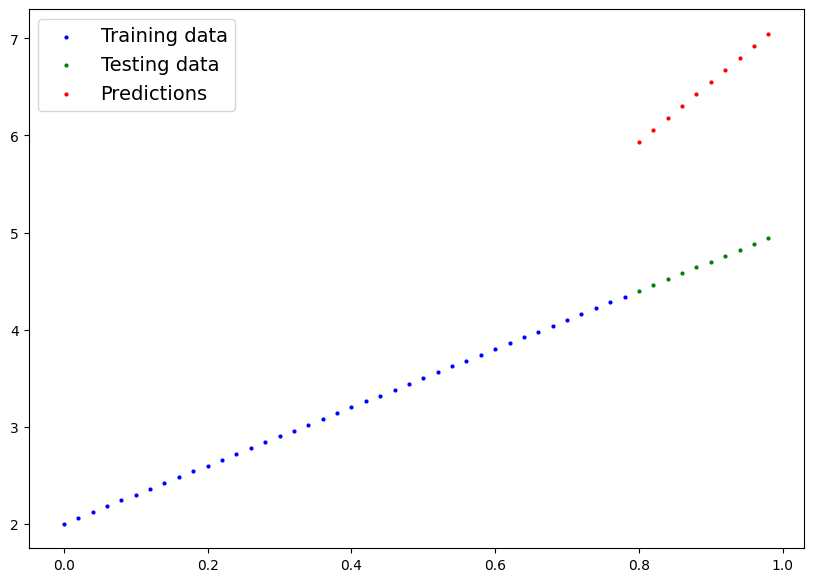

In [ ]:
plot_predictions(predictions=y_preds.cpu())
